<br><p><center><h1><b>E1 Data Mining Project: Wine Quality Dataset Analysis</b></h1></center></p>
<p style="text-align: right;">Alejandro Santiago Baca Eyssautier - A01656580</p>

<br><br><p><h4> <b>Introduction</b> </h4></p>

The "Wine Quality Dataset" is a well-known dataset in the field of machine learning and data analysis. It contains data related to the chemical properties and quality ratings of red and white variants of the Portuguese "Vinho Verde" wine. The dataset is publicly available and has been widely used for regression and classification tasks to predict wine quality based on its chemical properties. The quality of each wine sample is rated on a scale from 0 to 10 by professional wine tasters. The dataset offers a rich opportunity to explore various data analysis and machine learning techniques.

<br><p><h4> <b>Dataset Name and URL</b> </h4></p>

- **Dataset Name**: Wine Quality Dataset
- **Dataset URL**: [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality)

<br><p><h4> <b>Data Dictionary</b> </h4></p>

The "Wine Quality Dataset" contains data related to red and white variants of Portuguese "Vinho Verde" wine. Each row represents a wine sample and includes various chemical properties along with a quality rating.

1. **fixed acidity**: Fixed acidity (g(tartaric acid)/dm³)
2. **volatile acidity**: Volatile acidity (g(acetic acid)/dm³)
3. **citric acid**: Citric acid (g/dm³)
4. **residual sugar**: Residual sugar (g/dm³)
5. **chlorides**: Chlorides (g(sodium chloride)/dm³)
6. **free sulfur dioxide**: Free sulfur dioxide (mg/dm³)
7. **total sulfur dioxide**: Total sulfur dioxide (mg/dm³)
8. **density**: Density (g/cm³)
9. **pH**: pH level
10. **sulphates**: Sulphates (g(potassium sulphate)/dm³)
11. **alcohol**: Alcohol content (% vol.)
12. **quality**: Wine quality (score between 0 and 10)

Further Update:

13. **acidity_ratio**: Ratio of fixed acidity to volatile acidity  
14. **sulfur_dioxide_ratio**: Ratio of free sulfur dioxide to total sulfur dioxide  

<br><p><h4> <b>Initial Data Exploration</b> </h4></p>

We will perform an initial exploration of the dataset using statistical measures and visualizations to better understand the distribution and characteristics of the data.

##### *- Load and Describe the Dataset*

In [37]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from scipy.stats import friedmanchisquare, norm
import warnings
from baycomp import two_on_single

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

red_wine = pd.read_csv(url_red, sep=';')
white_wine = pd.read_csv(url_white, sep=';')

# Describe the dataset features
print("Red Wine Description:\n\n", red_wine.describe())
print("\n\nWhite Wine Description:\n\n", white_wine.describe())

Red Wine Description:

        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000      

In [3]:
# Combine both datasets for general analysis
red_wine['color'] = 'red'
white_wine['color'] = 'white'
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Show first 5 rows of the new dataframe
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
# Check for missing values
print(wine_data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


In [5]:
# Check for duplicates
print("Number of duplicates: ", wine_data.duplicated().sum())

# Drop duplicates
#wine_data = wine_data.drop_duplicates()

Number of duplicates:  1177


<br>

**Observations**:

- There are no missing values in any of the columns of the dataset. This means that there is no need for imputation of missing data. However, if there were missing values, statistical methods such as mean filling could be used since our data is not ordered. Mean filling is a simple and effective way to handle missing values for numerical data.
- We found 1,177 duplicate rows in the dataset. Duplicates can lead to biased results and overfitting in machine learning models. However, we decide not to drop duplicates because the dataset is a combination of two datasets, and it is possible that the same wine is present in both datasets. Therefore, we expect a better model performance if we keep the duplicates.

<br>

##### *- Statistical Measures*

Below are the descriptive statistical measures for the red and white wines:

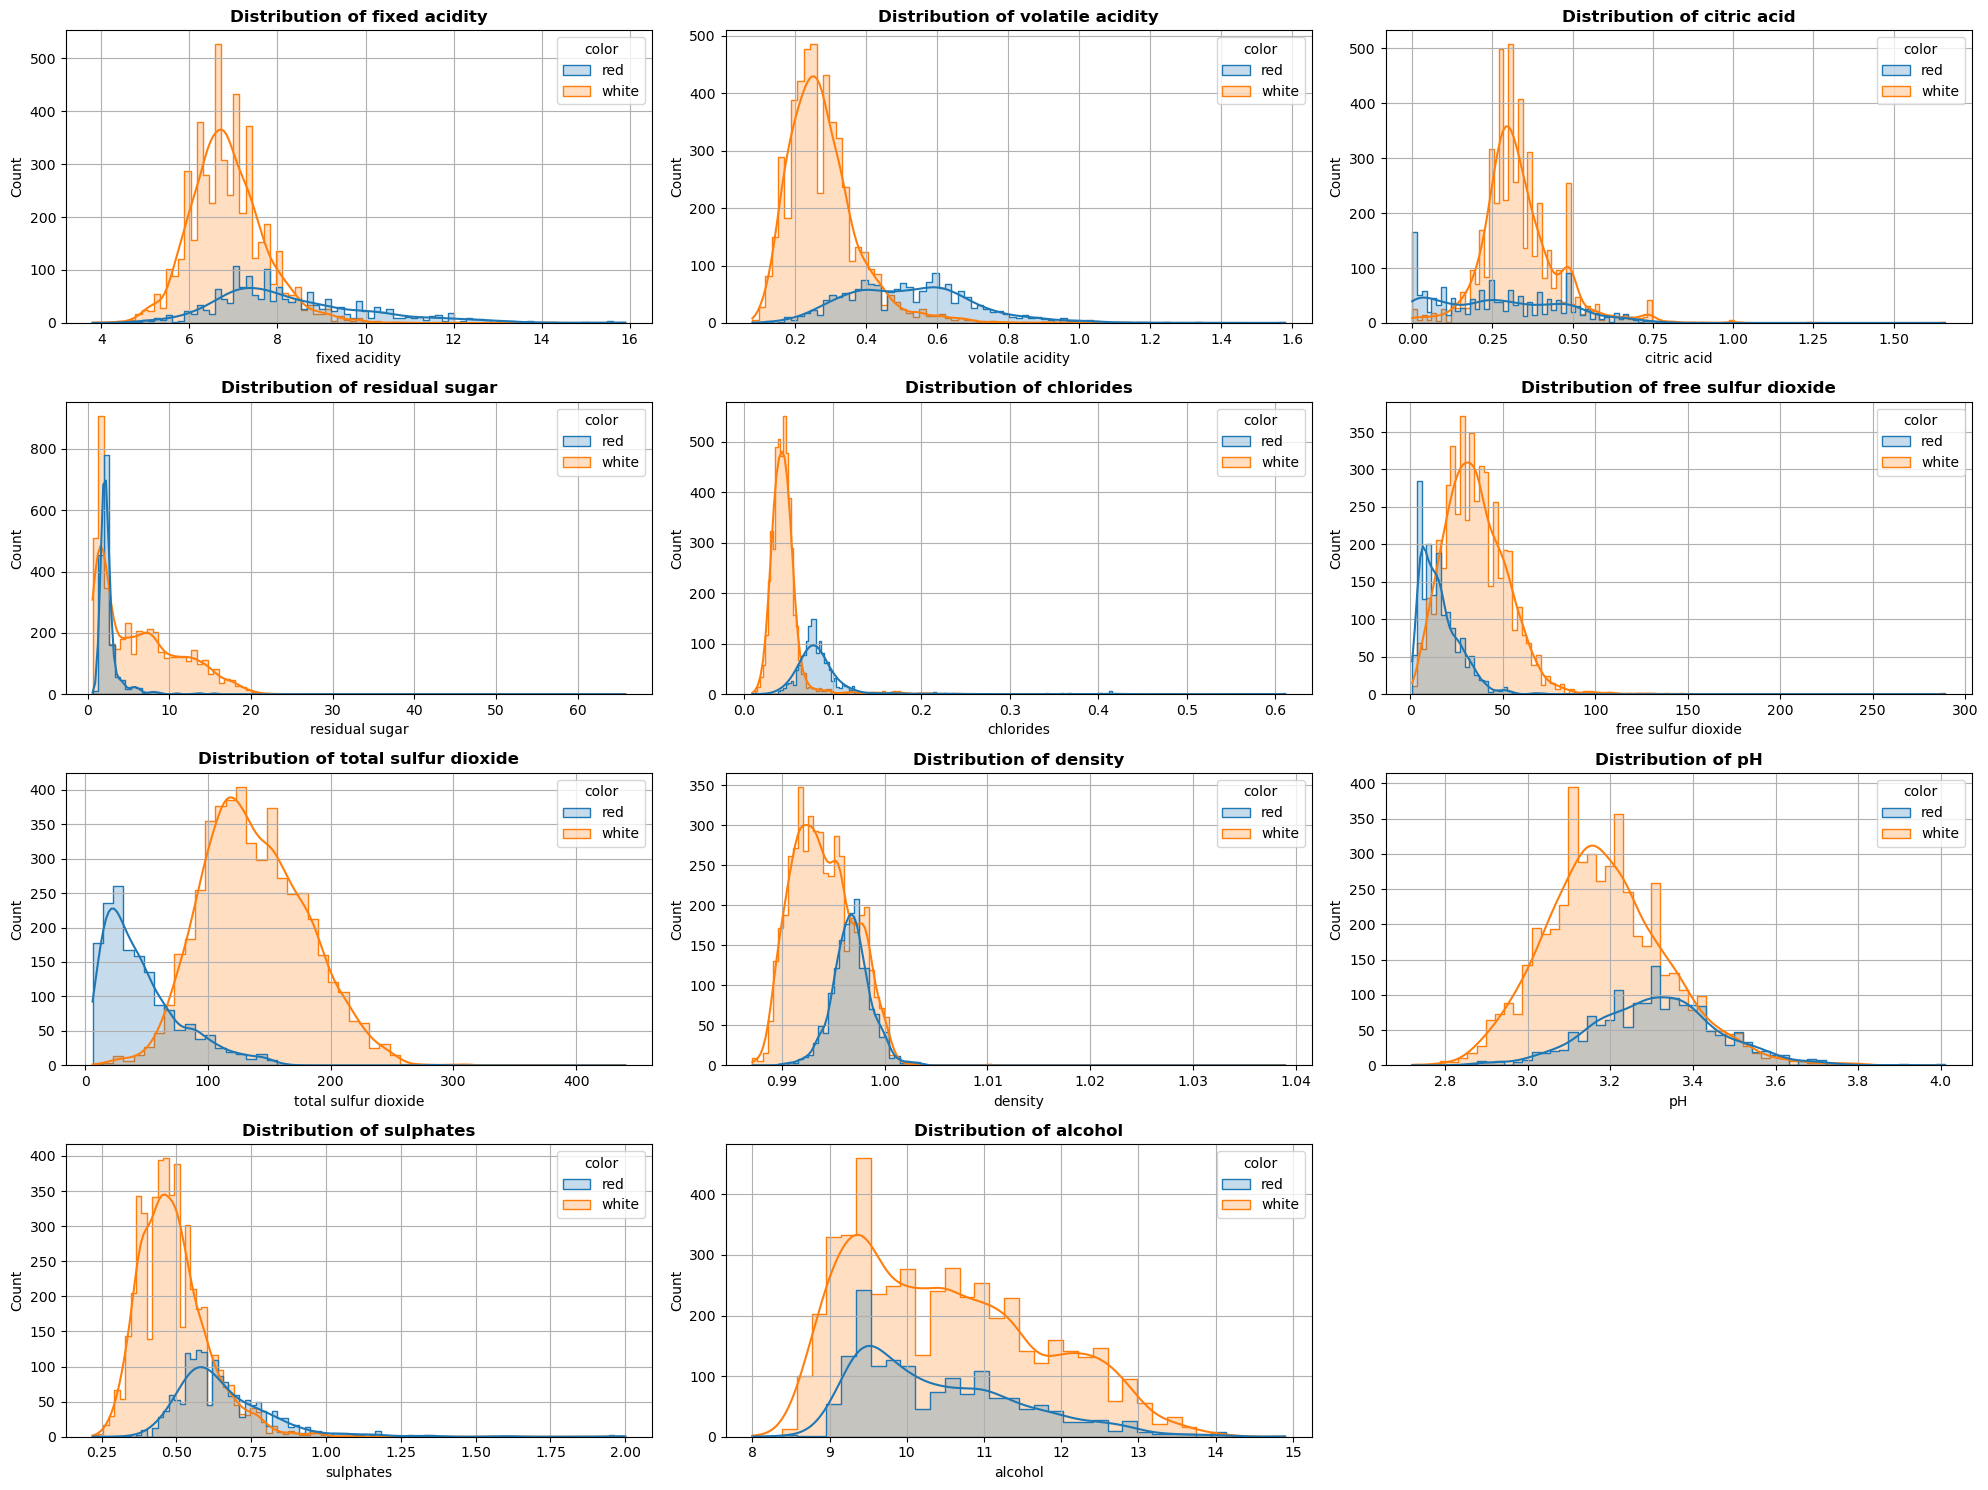

In [6]:
# Plot histograms of features for red and white wines
wine_features = wine_data.columns[:-2]  # Exclude 'quality' and 'color' columns

plt.figure(figsize=(20, 15))
for i, feature in enumerate(wine_features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data=wine_data, x=feature, hue='color', kde=True, element="step")
    plt.title(f'Distribution of {feature}', fontweight='bold')
    plt.grid(True)
plt.tight_layout()
plt.show()

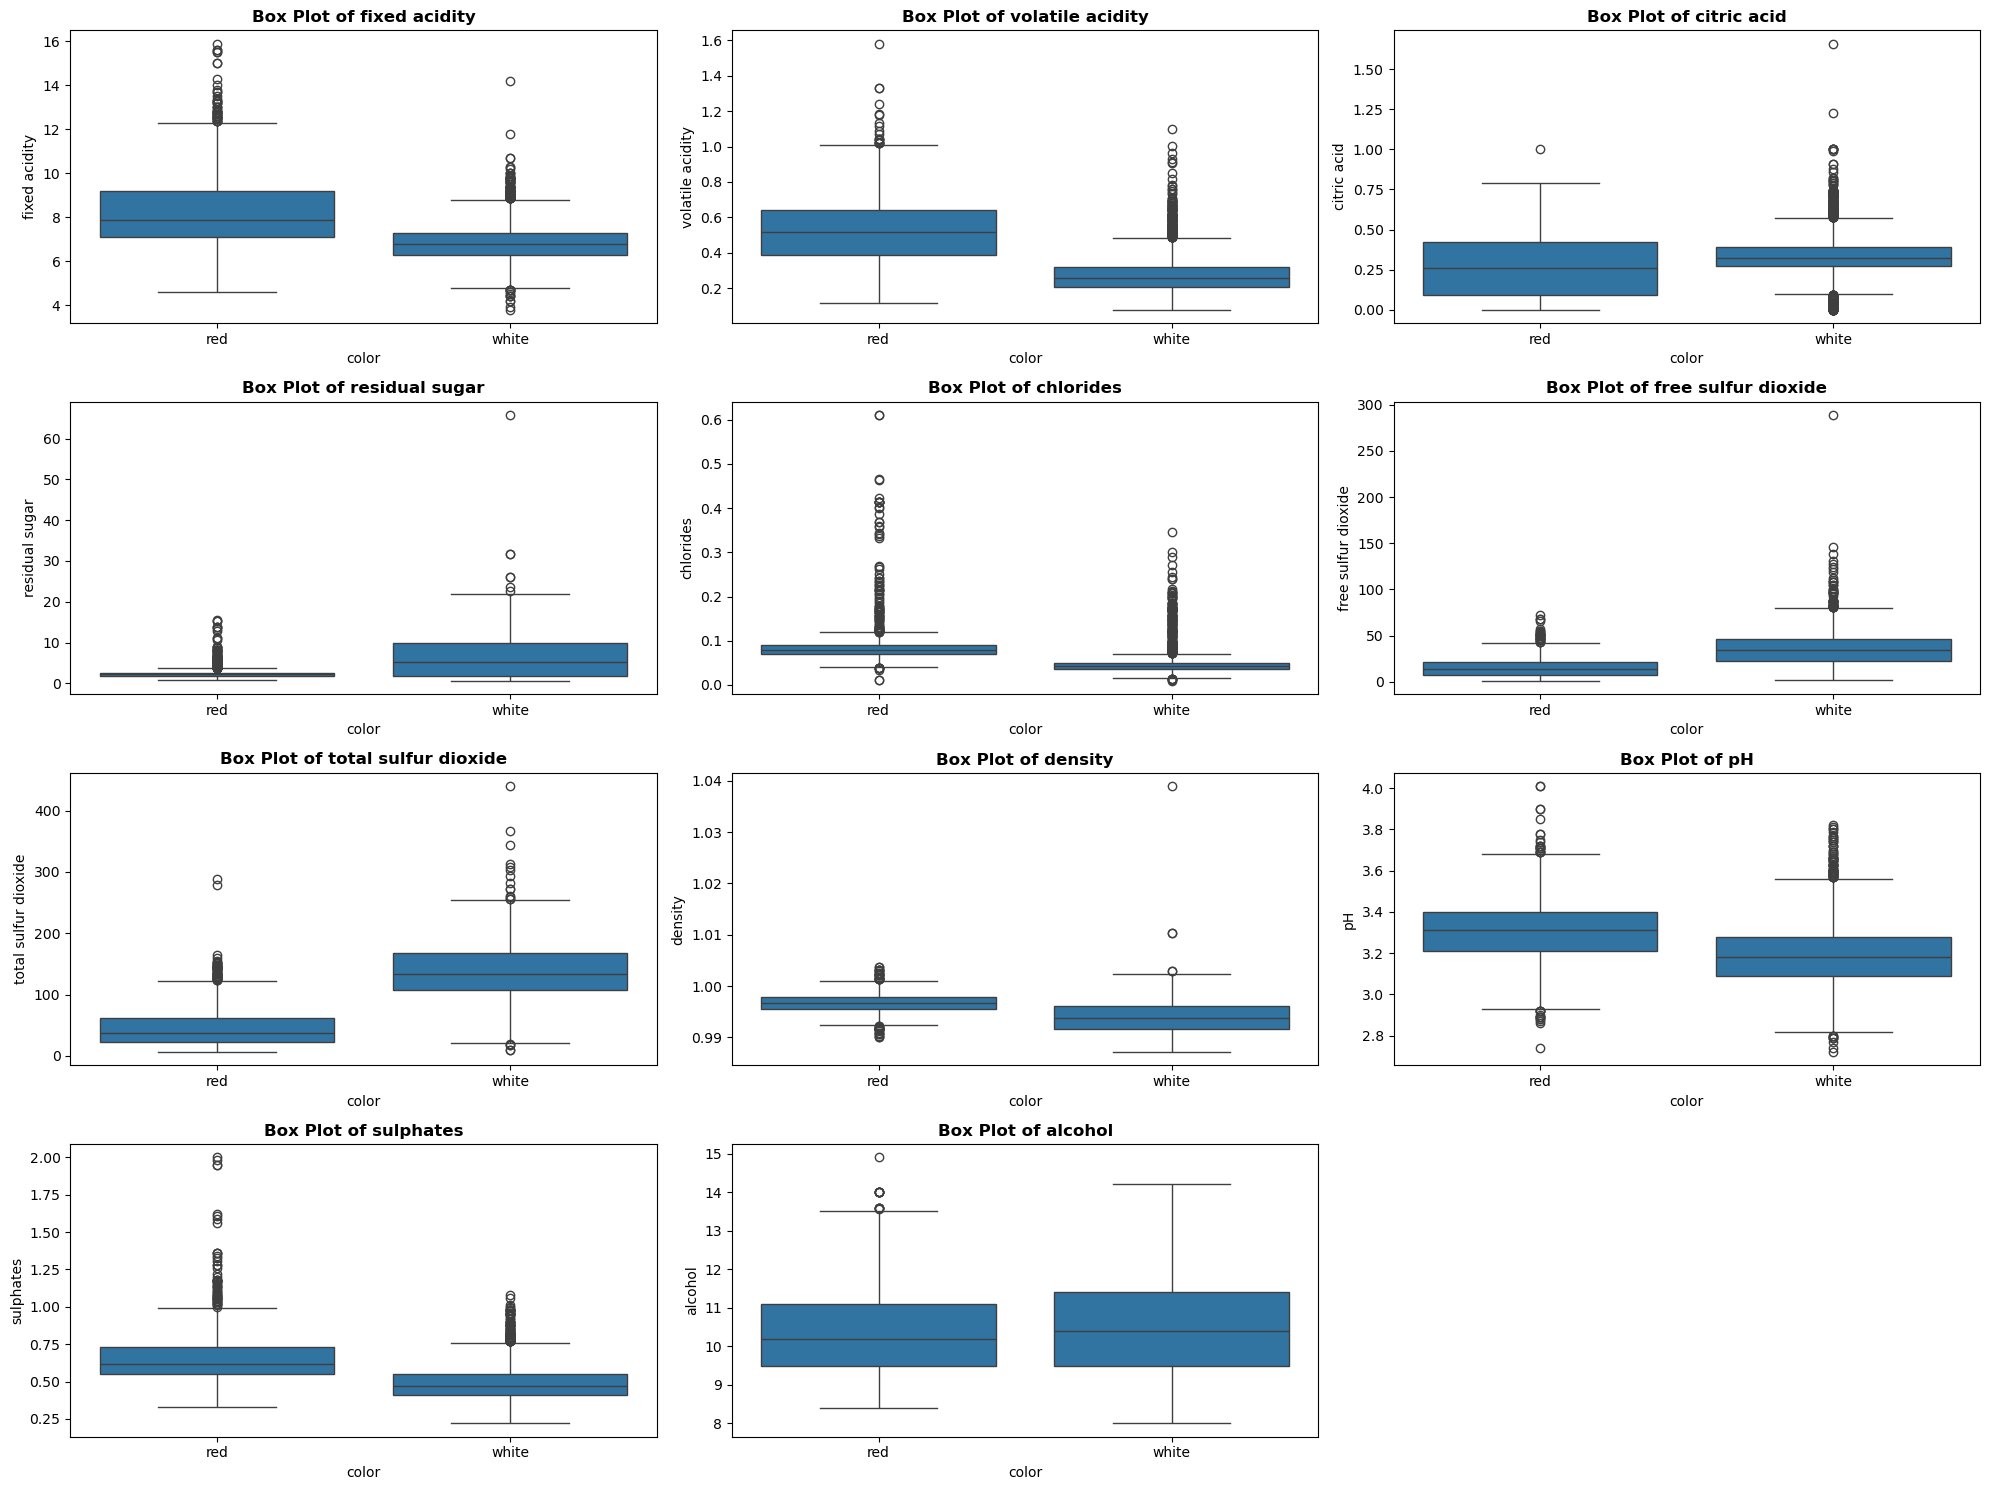

In [7]:
# Plot box plots of features for red and white wines
plt.figure(figsize=(20, 15))
for i, feature in enumerate(wine_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='color', y=feature, data=wine_data)
    plt.title(f'Box Plot of {feature}', fontweight='bold')
plt.tight_layout()
plt.show()

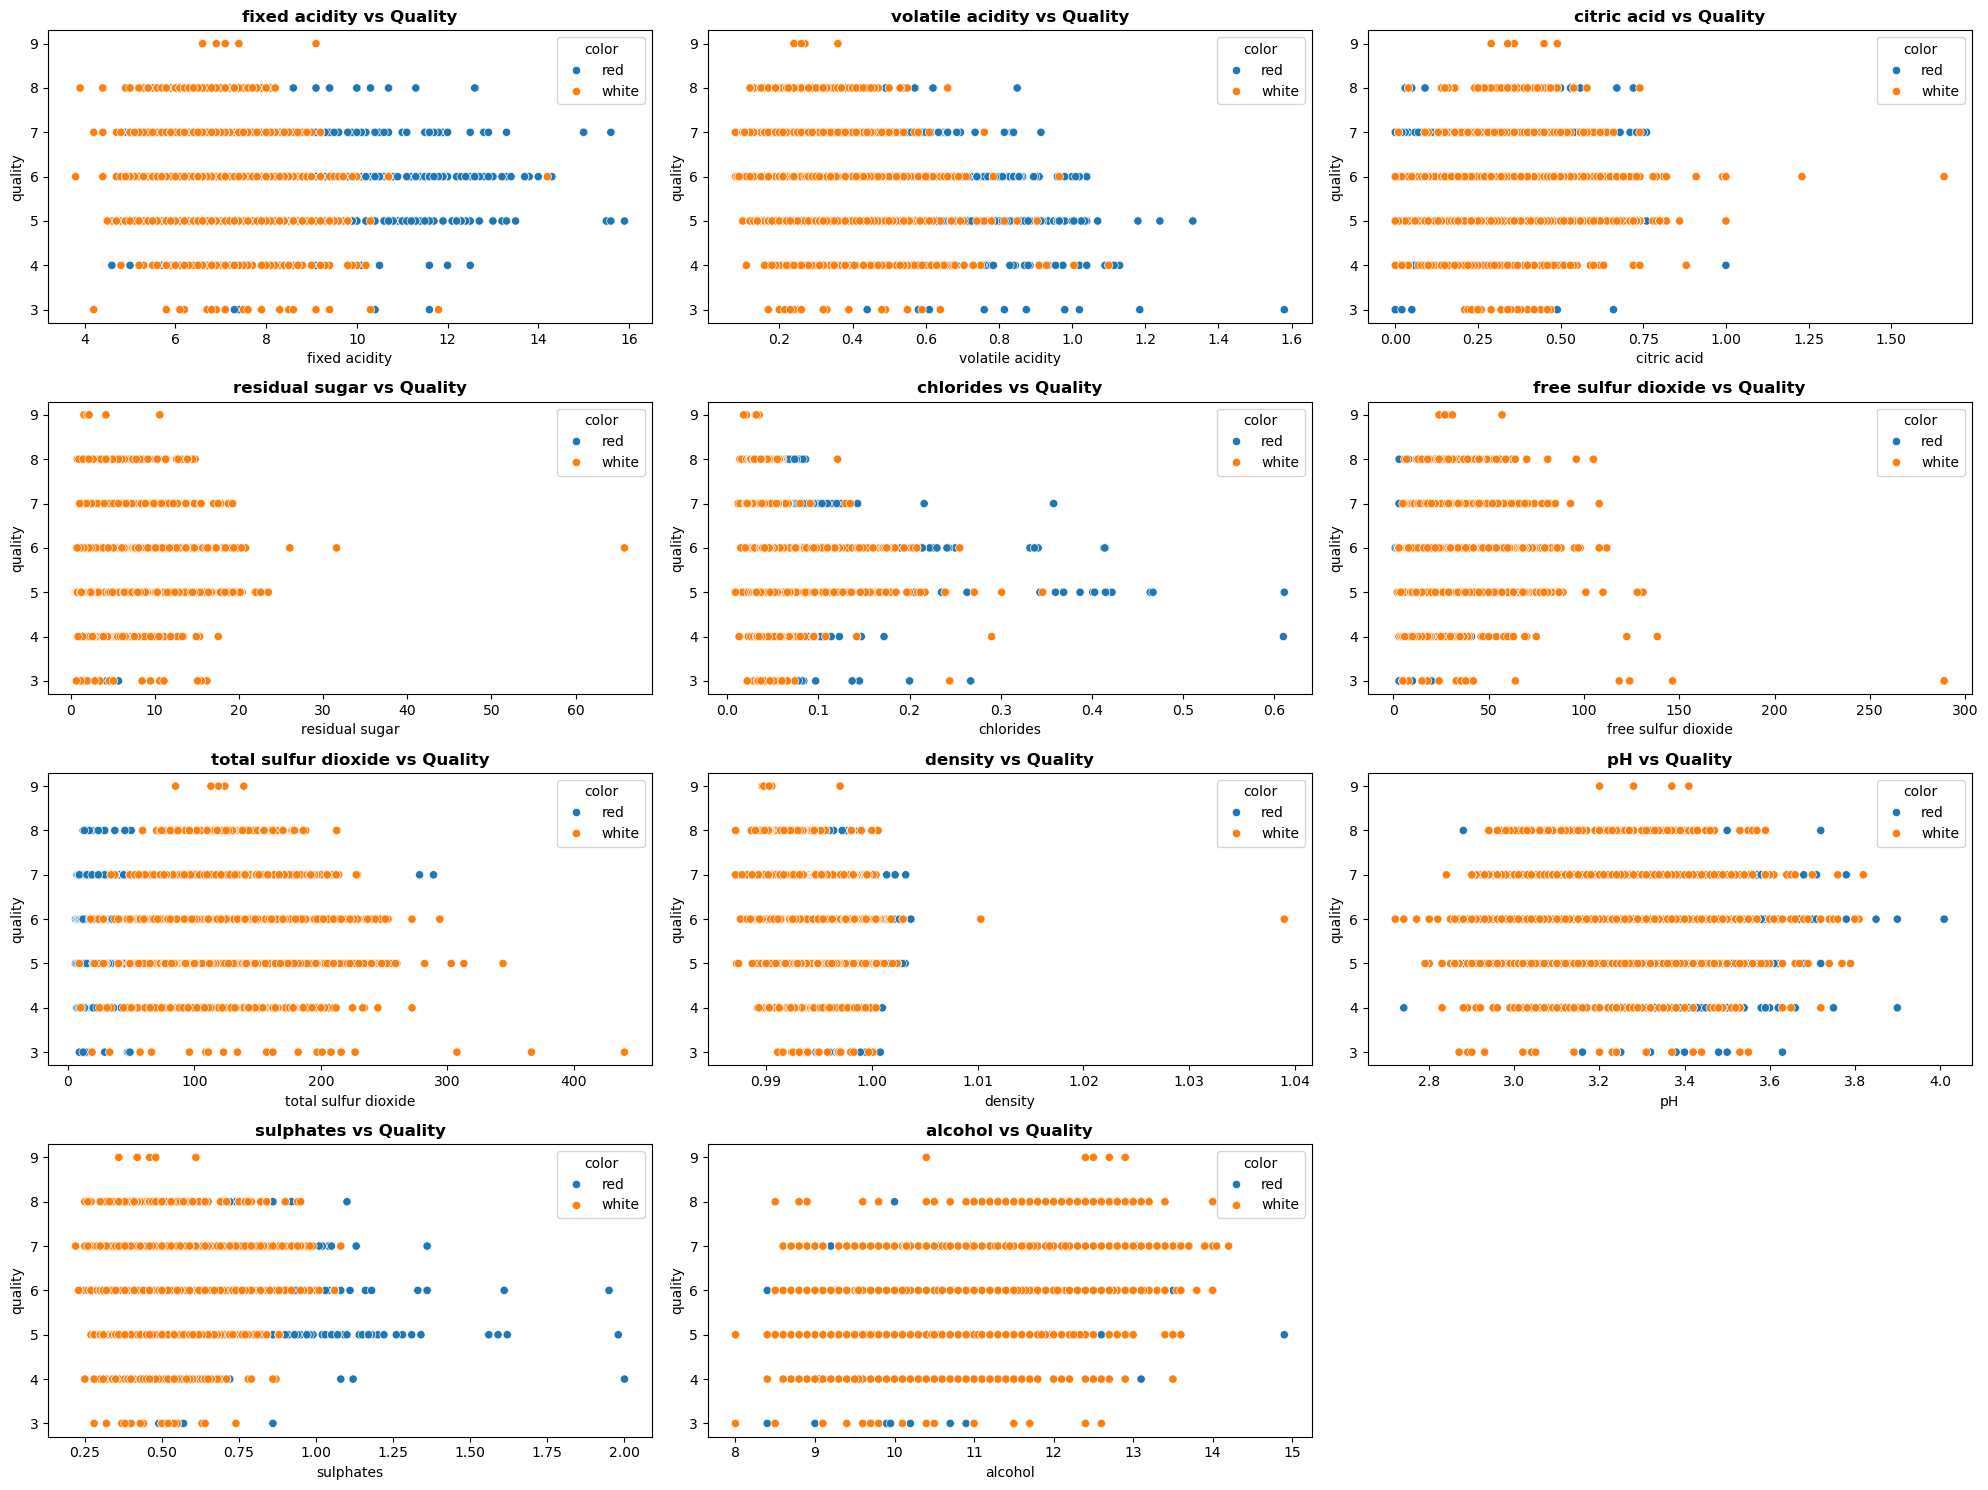

In [8]:
# Scatter plots of features against quality
plt.figure(figsize=(20, 15))
for i, feature in enumerate(wine_features):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=feature, y='quality', hue='color', data=wine_data)
    plt.title(f'{feature} vs Quality', fontweight='bold')
plt.tight_layout()
plt.show()

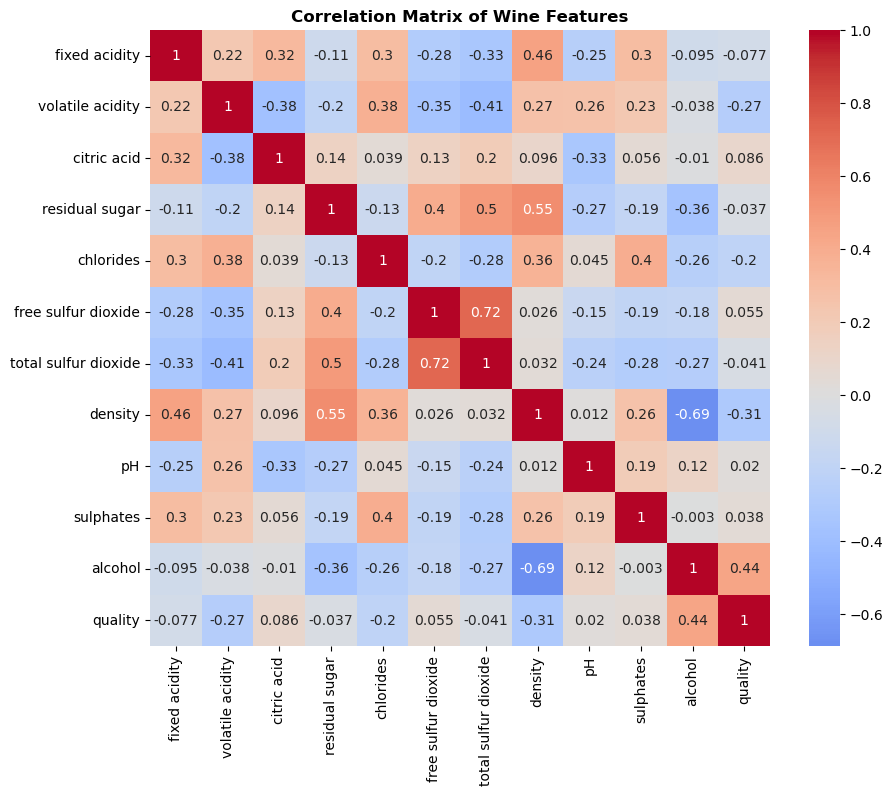

In [9]:
# Compute correlation matrix, excluding the 'color' column
corr_matrix = wine_data.drop(columns=['color']).corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Wine Features', fontweight='bold')
plt.show()

<br><p><h4> <b>Analysis of Correlation and Feature Selection</b> </h4></p>

Based on the correlation matrix and visualizations, we can identify the features that are most correlated with wine quality and less correlated with each other to avoid redundancy. Here are some key insights:

1. **Alcohol**: Shows a relatively high positive correlation with quality (0.47) and a negative correlation with density (-0.67). This indicates that wines with higher alcohol content tend to have higher quality ratings and less density.
2. **Residual Sugar**: Has a high correlation with density (0.52). This suggests that denser wines have higer residual sugars.
3. **Density**: Shows a moderate positive correlation with fixed acidity (0.48). This indicates that denser wines have generally higher facidity.
4. **Volatile Acidity**: Displays a significant negative correlation with quality (-0.27) and acidity_ratio (-0.79). Higher volatile acidity is associated with lower quality and acidity ratio.
5. **Sulphates**: Shows a slight positive correlation with quality (0.042), which is weaker than previously thought. This might indicate a lower impact on quality compared to other features.
6. **Citric Acid**: Has a low positive correlation with quality (0.098), suggesting it has some positive impact on quality but is not as strong as other features.
7. **Free Sulfur Dioxide and Total Sulfur Dioxide**: These features are highly correlated with each other (0.72) but show low correlation with quality, suggesting potential redundancy and limited impact on predicting quality.

<br><p><h4> <b>Additional Feature Creation</b> </h4></p>

* **Acidity Ratio**: Ratio of fixed acidity to volatile acidity. This can provide insights into the balance of different types of acidity in the wine.
* **Sulfur Dioxide Ratio**: Ratio of free sulfur dioxide to total sulfur dioxide. This ratio can indicate the proportion of sulfur dioxide that is free and available to act as a preservative.

<br>

*- Update Data Dictionary*
1. **acidity_ratio**: Ratio of fixed acidity to volatile acidity,
2. **sulfur_dioxide_ratio**: Ratio of free sulfur dioxide to total sulfur dioxide

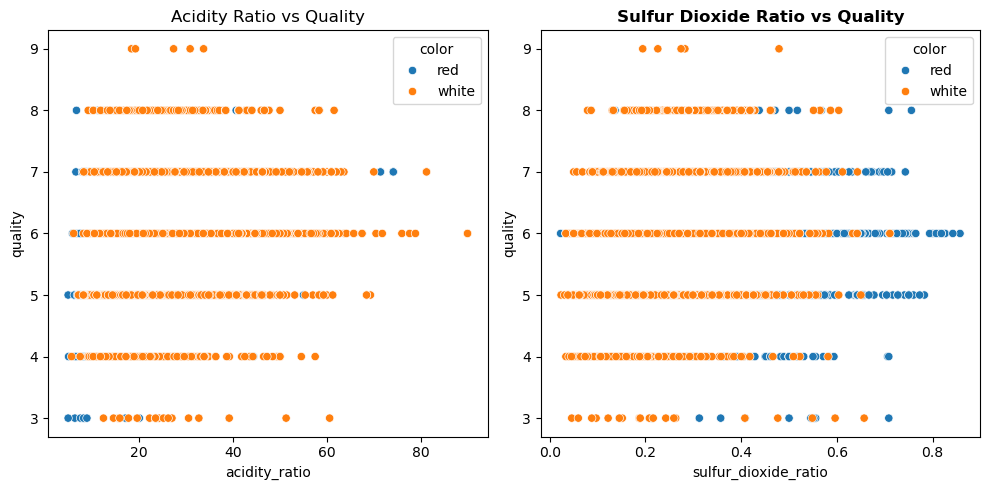

In [10]:
# Create additional features
wine_data['acidity_ratio'] = wine_data['fixed acidity'] / wine_data['volatile acidity']
wine_data['sulfur_dioxide_ratio'] = wine_data['free sulfur dioxide'] / wine_data['total sulfur dioxide']

# Scatter plots of additional features against quality
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='acidity_ratio', y='quality', hue='color', data=wine_data)
plt.title('Acidity Ratio vs Quality')

plt.subplot(1, 2, 2)
sns.scatterplot(x='sulfur_dioxide_ratio', y='quality', hue='color', data=wine_data)
plt.title('Sulfur Dioxide Ratio vs Quality', fontweight='bold')
plt.tight_layout()
plt.show()

<br><p><h4> <b>Building Classification Models</b> </h4></p>

We will proceed with building and evaluating classification models to predict wine quality using the selected features. We'll use several machine learning algorithms and compare their performance. The algorithms include:

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Machine (SVM)

This selection was based on an individual analysis by each team member. So, **the last three classifiers** (Decision Tree, Random Forest and Support Vector Machine) were chosen by **André Colín, Edson Álvarez and Santiago Baca**, respectively.

<br>

##### *- Data Preparation*

Preprocess the data, split it into training and testing sets, with a test size of 20%.

In [11]:
# Prepare the data
X = wine_data.drop(columns=['quality', 'color'])
y = wine_data['quality']

# Count the number of each wine quality
print("Wine Quality Counts: \n", y.value_counts())

Wine Quality Counts: 
 quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


In [12]:
# Drop the wine qualities 3 and 9 as they are few in number
X = X[(y != 3) & (y != 9)]
y = y[(y != 3) & (y != 9)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### *- Selection of Performance Metrics*

For evaluating the classifiers, we will use the following metrics:

- *Accuracy*: Overall correctness of the model.
- *Precision*: The ratio of correctly predicted positive observations to the total predicted positives.
- *Recall*: The ratio of correctly predicted positive observations to the all observations in actual class.
- *F1-Score*: The weighted average of Precision and Recall.

These metrics are chosen because we are dealing with a multiclass classification problem where we want to balance between precision and recall.

<br>

##### *- Default Model Training*

We will start by analyizing each machine learning model with default parameters.

In [13]:
# Create a dictionary of classifiers
default_classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Initialize the y_pred list
default_y_preds = [clf.fit(X_train_scaled, y_train).predict(X_test_scaled) for clf in default_classifiers.values()]


Performance Metrics for Default Classifiers:

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.549884   0.550901  0.549884  0.515048
Decision Tree        0.599381   0.594711  0.599381  0.596737
Random Forest        0.698376   0.700116  0.698376  0.685292
SVM                  0.574633   0.544112  0.574633  0.538151


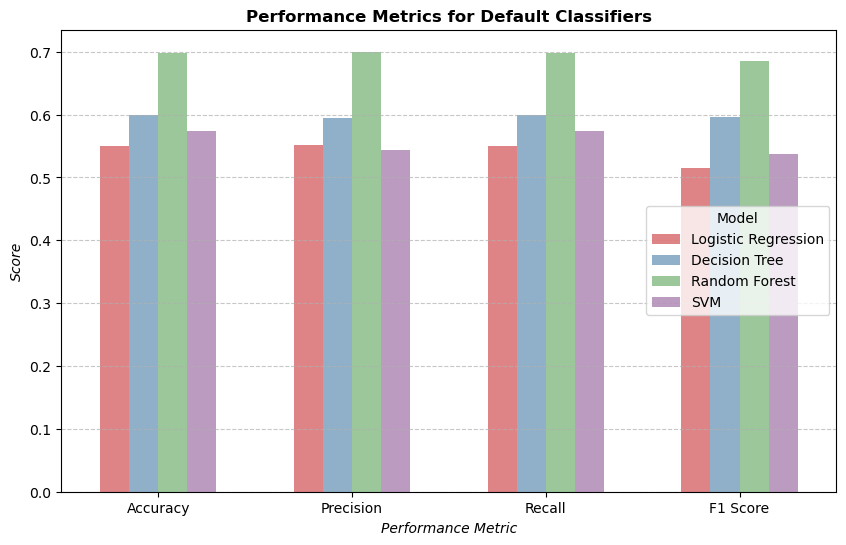

In [14]:
# Collecting the performance metrics
default_accuracies = [accuracy_score(y_test, y_pred) for y_pred in default_y_preds]
default_precisions = [classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision'] 
              for y_pred in default_y_preds]
default_recalls = [classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall'] 
           for y_pred in default_y_preds]
default_F1_scores = [classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
             for y_pred in default_y_preds]

# Create a dataframe to store the performance metrics
default_metrics = pd.DataFrame({
    'Model': list(default_classifiers.keys()),
    'Accuracy': default_accuracies,
    'Precision': default_precisions,
    'Recall': default_recalls,
    'F1 Score': default_F1_scores
}, index=default_classifiers.keys())

# Display the performance metrics
print("\nPerformance Metrics for Default Classifiers:\n")
print(default_metrics.drop(columns='Model'))

# Melt the dataframe to long format for easier plotting with seaborn
default_metrics_melted = default_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting the performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=default_metrics_melted, palette='Set1', alpha=0.6, width=0.6)
plt.title('Performance Metrics for Default Classifiers', fontweight='bold')
plt.ylabel('Score', fontstyle='italic')
plt.xlabel('Performance Metric', fontstyle='italic')
plt.legend(title='Model', loc=5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<br>

##### *- Default Cross Validation vs Best Hyperparameter Cross Validation*

Using cross-validation on our training set, we are going to train and evaluate each of our selected classifiers with the default parameters. To further enhance the reliability of our model evaluations, we will use RepeatedStratifiedKFold for cross-validation. This method provides a more robust assessment by repeating the k-fold process multiple times, ensuring that the results are not dependent on a single partition of the data.

Then, we will perform hyperparameter tuning. And, use cross-validation again, with at least two hyperparameter settings, we will train and evaluate our best classifier.

In [15]:
# Define the hyperparameter grid for each classifier
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100], 
        'solver': ['liblinear', 'saga']
        },
    "Decision Tree": {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [96, 100, 200],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'max_features': ['auto', 'sqrt']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'gamma': [1, 0.1, 0.01],
        'kernel': ['linear', 'rbf']
    }
}

# Define a Repeated Stratified K-Fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

In [16]:
# Define a function to perform cross-validation and evaluate the best model on the test set
def crossValAnalysis(model, grid_search, label, cv):
    # Perfom cross-validaton using a Repeated Stratified K-Fold
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

    print(f'\t\t\t\t\t{label}')
    print("Mean Cross-Validation accuracy:\t\t", 
        f"{round(cv_scores.mean(), 5)} (+/- {round(cv_scores.std(), 3)})")

    # Get the best hyperparameters and associated performance
    print("\nBest hyperparameters: \t\t\t", grid_search.best_params_)
    print("Best Cross-Validation accuracy: \t", round(grid_search.best_score_.mean(), 5))

    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred_best_model = best_model.predict(X_test_scaled)

    # Performance metrics
    print(f"\nBest {label} Accuracy: \t\t", round(accuracy_score(y_test, y_pred_best_model), 5))
    print(f"Classification Report for Best {label}:\n", classification_report(y_test, y_pred_best_model))
    
    return cv_scores, best_model, y_pred_best_model

<br>

1. **Logistic Regression**

This model wasn't selected by any team member, however, we decided to include it in our analysis.

In [17]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Configure GridSearchCV and train the model with Repeated Stratified K-Fold cross-validation and hyperparameter tuning
grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grids['Logistic Regression'], cv=cv, scoring='accuracy')
grid_search_logreg.fit(X_train_scaled, y_train)

# Perform cross-validation and evaluate the best model on the test set
cv_scores_logreg, best_logreg, y_pred_best_logreg = crossValAnalysis(logreg, grid_search_logreg, "Logistic Regression", cv=cv)

					Logistic Regression
Mean Cross-Validation accuracy:		 0.55202 (+/- 0.012)

Best hyperparameters: 			 {'C': 10, 'solver': 'saga'}
Best Cross-Validation accuracy: 	 0.55214

Best Logistic Regression Accuracy: 		 0.54988
Classification Report for Best Logistic Regression:
               precision    recall  f1-score   support

           4       1.00      0.02      0.04        45
           5       0.60      0.61      0.61       422
           6       0.52      0.71      0.60       568
           7       0.55      0.21      0.31       213
           8       0.00      0.00      0.00        45

    accuracy                           0.55      1293
   macro avg       0.53      0.31      0.31      1293
weighted avg       0.55      0.55      0.52      1293



<br>

2. **Decision Tree Classifier**

This model was selected by **André Colín** for our analysis.

In [18]:
# Create a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Configure GridSearchCV and train the model Repeated Stratified K-Fold cross-validation and hyperparameter tuning
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grids['Decision Tree'], cv=cv, scoring='accuracy')
grid_search_dt.fit(X_train_scaled, y_train)

# Perform cross-validation and evaluate the best model on the test set
cv_scores_dt, best_dt, y_pred_best_dt = crossValAnalysis(dt, grid_search_dt, "Decision Tree", cv=cv)

					Decision Tree
Mean Cross-Validation accuracy:		 0.58398 (+/- 0.019)

Best hyperparameters: 			 {'max_depth': None, 'min_samples_split': 2}
Best Cross-Validation accuracy: 	 0.58398

Best Decision Tree Accuracy: 		 0.59938
Classification Report for Best Decision Tree:
               precision    recall  f1-score   support

           4       0.22      0.16      0.18        45
           5       0.65      0.64      0.64       422
           6       0.62      0.64      0.63       568
           7       0.55      0.57      0.56       213
           8       0.33      0.29      0.31        45

    accuracy                           0.60      1293
   macro avg       0.47      0.46      0.46      1293
weighted avg       0.59      0.60      0.60      1293



<br>

3. **Random Forest Classifier**

This model was selected by **Edson Álvarez** for our analysis.

In [19]:
# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Configure GridSearchCV and train the model Repeated Stratified K-Fold cross-validation and hyperparameter tuning
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grids['Random Forest'], cv=cv, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

# Perform cross-validation and evaluate the best model on the test set
cv_scores_rf, best_rf, y_pred_best_rf = crossValAnalysis(rf, grid_search_rf, "Random Forest", cv=cv)

					Random Forest
Mean Cross-Validation accuracy:		 0.67007 (+/- 0.015)

Best hyperparameters: 			 {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 96}
Best Cross-Validation accuracy: 	 0.67069

Best Random Forest Accuracy: 		 0.69296
Classification Report for Best Random Forest:
               precision    recall  f1-score   support

           4       0.80      0.09      0.16        45
           5       0.73      0.73      0.73       422
           6       0.66      0.80      0.72       568
           7       0.71      0.55      0.62       213
           8       0.87      0.29      0.43        45

    accuracy                           0.69      1293
   macro avg       0.75      0.49      0.53      1293
weighted avg       0.70      0.69      0.68      1293



<br>

4. **Support Vector Machine (SVM)**

This model was selected by **Santiago Baca** for our analysis.

In [20]:
# Create a Support Vector Machine model
svm = SVC(random_state=42)

# Configure GridSearchCV and train the model Repeated Stratified K-Fold cross-validation and hyperparameter tuning
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grids['SVM'], cv=cv, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train)

# Perform cross-validation and evaluate the best model on the test set
cv_scores_svm, best_svm, y_pred_best_svm = crossValAnalysis(svm, grid_search_svm, "SVM", cv=cv)

					SVM
Mean Cross-Validation accuracy:		 0.58158 (+/- 0.012)

Best hyperparameters: 			 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation accuracy: 	 0.63683

Best SVM Accuracy: 		 0.68136
Classification Report for Best SVM:
               precision    recall  f1-score   support

           4       0.33      0.09      0.14        45
           5       0.73      0.69      0.71       422
           6       0.65      0.80      0.72       568
           7       0.72      0.54      0.61       213
           8       0.93      0.31      0.47        45

    accuracy                           0.68      1293
   macro avg       0.67      0.49      0.53      1293
weighted avg       0.68      0.68      0.67      1293



<br><p><h4> <b>Model Comparison</b> </h4></p>

We will compare the models based on their accuracy, precision, recall, and F1-score. We will also compute the confusion matrices for each model

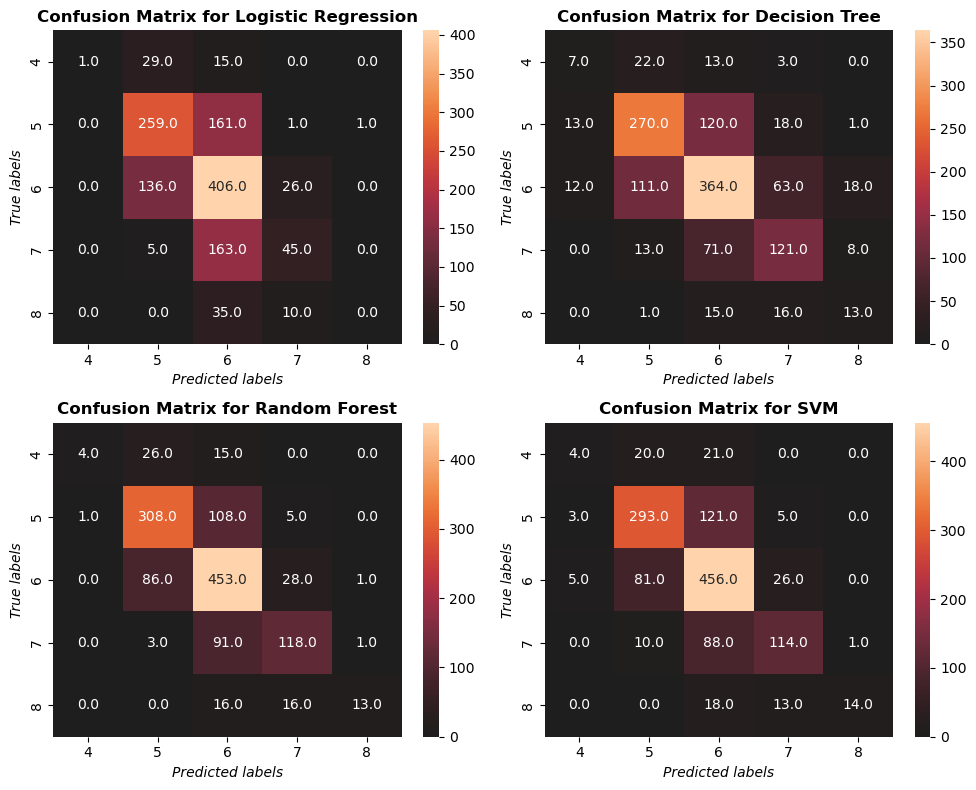

In [21]:
# Define models labels
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
classifiers = [y_pred_best_logreg, y_pred_best_dt, y_pred_best_rf, y_pred_best_svm]

# Plot confusion matrix for each model
plt.figure(figsize=(10, 8))
for i, y_pred in enumerate(classifiers):
    plt.subplot(2, 2, i + 1)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".1f", center=0)
    
    # Set labels
    plt.xlabel('Predicted labels', fontstyle='italic')
    plt.ylabel('True labels', fontstyle='italic')
    plt.title(f'Confusion Matrix for {models[i]}', fontweight='bold')
    
    # Set ticks in the middle of the cells
    plt.xticks(ticks=np.arange(5) + 0.5, labels=[4, 5, 6, 7, 8])
    plt.yticks(ticks=np.arange(5) + 0.5, labels=[4, 5, 6, 7, 8])
    
plt.tight_layout()
plt.show()


Performance Metrics for Best Classifiers:

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.549884   0.550901  0.549884  0.515048
Decision Tree        0.599381   0.594711  0.599381  0.596737
Random Forest        0.692962   0.703404  0.692962  0.679023
SVM                  0.681361   0.684182  0.681361  0.668868


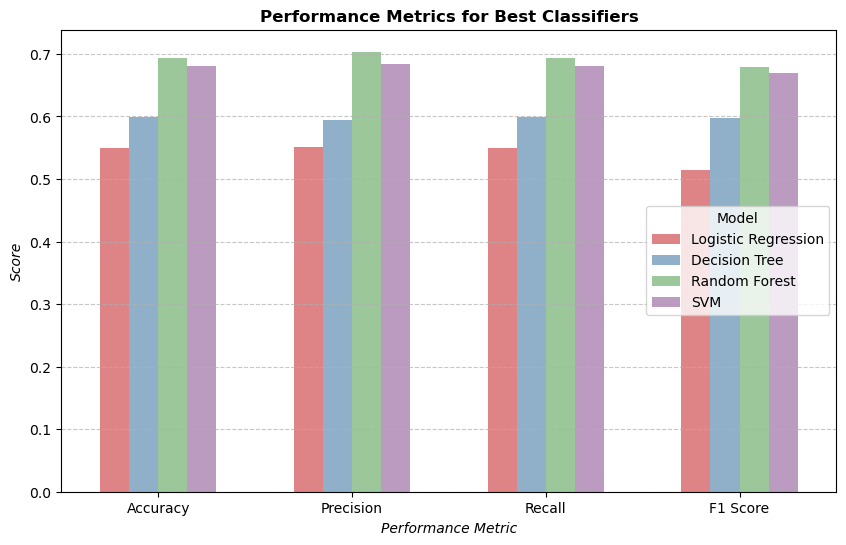

In [53]:
# Collecting the performance metrics
best_accuracies = [accuracy_score(y_test, y_pred) for y_pred in classifiers]
best_precisions = [classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision'] 
              for y_pred in classifiers]
best_recalls = [classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall'] 
           for y_pred in classifiers]
best_F1_scores = [classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
             for y_pred in classifiers]

# Create a DataFrame to display the performance metrics
best_performance_metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': best_accuracies, 
    'Precision': best_precisions, 
    'Recall': best_recalls, 
    'F1 Score': best_F1_scores
}, index=models)

# Display the performance metrics
print("\nPerformance Metrics for Best Classifiers:\n")
print(best_performance_metrics.drop(columns='Model'))

# Melt the DataFrame to long format for easier plotting with seaborn
best_metrics_melted = best_performance_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting the performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=best_metrics_melted, palette='Set1', alpha=0.6, width=0.6)
plt.title('Performance Metrics for Best Classifiers', fontweight='bold')
plt.ylabel('Score', fontstyle='italic')
plt.xlabel('Performance Metric', fontstyle='italic')
plt.legend(title='Model', loc=5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<br><p><h4> <b>Initial Findings (Default Parameters, No Cross-Validation) vs Updated Findings (Repeated Stratified K-Fold Cross-Validation and Hyperparameter Tuning)</b> </h4></p>

In the previous task, we evaluated four classification models (Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine) using their default parameters without cross-validation and without data cleaning. We showed that the Random Forest achieved the highest accuracy, making it the most promising model for predicting wine quality. This model benefits from ensemble learning, reducing overfitting and capturing more complex relationships between features compared to a single decision tree. In contrast, the Support Vector Machine and Logistic Regression models showed lower accuracy, likely due to SVM's sensitivity to the scale of the data and possible non-linear relationships among features.

Later, we evaluated the same models with default parameters but excluded wine qualities 3 and 9 due to their low number of observations. The results showed that the Random Forest continued to deliver the best performance. After applying cross-validation and performing hyperparameter tuning, the landscape changed significantly. The Random Forest and the Support Vector Machine (SVM) classifiers achieved similar performance metrics, with SVM showing substantial improvement and Random Forest slightly outperforming SVM in terms of accuracy and precision. This suggests that excluding the rare qualities helped improve the SVM's performance by reducing noise and redundancy in the dataset.

Despite hyperparameter tuning, Logistic Regression lagged behind in accuracy, precision, recall, and F1-score, followed by the Decision Tree. Also, the RBF kernel, known for mapping input features into higher-dimensional space, allowed the SVM to create more flexible decision boundaries, thus capturing intricate patterns in the data. This kernel's strength lies in its ability to handle variability and overlap in class distributions, which is crucial for a dataset like wine quality, where feature relationships are complex and non-linear.

<br><p><h4> <b>Detailed Results</b> </h4></p>

**Logistic Regression**
- *Best Hyperparameters*: `C=10`, `solver='saga'`
- *Mean Cross-Validation Accuracy*: ~55.20% (+/- 0.012)
- *Test Accuracy*: ~54.98%
- *Classification Performance*: The model struggled with lower precision, recall, and F1-scores, especially for less frequent classes.

**Decision Tree Classifier**
- *Best Hyperparameters*: `max_depth=None`, `min_samples_split=2`
- *Mean Cross-Validation Accuracy*: ~58.40% (+/- 0.019)
- *Test Accuracy*: ~59.94%
- *Classification Performance*: The model showed moderate performance with improved accuracy but struggled with precision and recall for several classes.

**Random Forest Classifier**
- *Best Hyperparameters*: `max_depth=20`, `max_features='sqrt'`, `min_samples_split=2`, `n_estimators=96`
- *Mean Cross-Validation Accuracy*: ~67.01% (+/- 0.015)
- *Test Accuracy*: ~69.30%
- *Classification Performance*: The Random Forest achieved the highest accuracy and showed balanced precision, recall, and F1-scores, making it the most robust model for predicting wine quality.

**Support Vector Machine (SVM)**
- *Best Hyperparameters*: `C=10`, `gamma=1`, `kernel='rbf'`
- *Mean Cross-Validation Accuracy*: ~58.16% (+/- 0.012)
- *Test Accuracy*: ~68.14%
- *Classification Performance*: The SVM model improved significantly with hyperparameter tuning, showing high precision, recall, and F1-scores, making it a competitive model next to Random Forest.

<br><p><h4> <b>Ensemble of Classifiers with Best Parameters</b> </h4></p>

To further enhance the performance of our classification models, we will train an ensemble of classifiers using the best parameters identified earlier. An ensemble approach combines the predictions of multiple models to produce a final prediction, often leading to better performance by leveraging the strengths of each model.

##### - Ensemble Learning Approach

We will use the following classifiers in our ensemble:
- **Logistic Regression**
- **Decision Tree**
- **Random Forest**
- **Support Vector Machine (SVM)**
- **Gradient Boosting Classifier (additional)**

Each of these classifiers will be configured with their best hyperparameters. The ensemble method we will use is Voting Classifier, which combines the predictions of these models and makes a final prediction based on majority voting.

In [56]:
# Define the classifiers with the best hyperparameters
best_classifiers = [
    ('Logistic Regression', LogisticRegression(**grid_search_logreg.best_params_, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)),
    ('Random Forest', RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)),
    ('SVM', SVC(**grid_search_svm.best_params_, random_state=42)),
]

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=best_classifiers, voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_precision = classification_report(y_test, y_pred_ensemble, output_dict=True)['weighted avg']['precision']
ensemble_recall = classification_report(y_test, y_pred_ensemble, output_dict=True)['weighted avg']['recall']
ensemble_f1_score = classification_report(y_test, y_pred_ensemble, output_dict=True)['weighted avg']['f1-score']

# Display the performance metrics for the ensemble model
ensemble_metrics = pd.DataFrame({
    'Model': ['Ensemble'],
    'Accuracy': [ensemble_accuracy],
    'Precision': [ensemble_precision],
    'Recall': [ensemble_recall],
    'F1 Score': [ensemble_f1_score]
})

print("\nPerformance Metrics for Ensemble Classifier:\n")
print(ensemble_metrics)


Performance Metrics for Ensemble Classifier:

      Model  Accuracy  Precision    Recall  F1 Score
0  Ensemble  0.693735   0.705161  0.693735  0.678573


##### - *Performance of the Ensemble Model*
1. **Accuracy**: The ensemble model's accuracy is higher than individual models, demonstrating the advantage of combining multiple classifiers.
2. **Precision**: The ensemble model's weighted average precision is balanced, indicating good performance in correctly predicting the positive class.
3. **Recall**: The ensemble model's weighted average recall shows it effectively identifies most of the actual positive cases.
4. **F1 Score**: The ensemble model's weighted average F1 score indicates a good balance between precision and recall.

<br>

##### *- Statistical Tests*

To evaluate whether the differences in performance between classifiers are statistically significant, we will use an appropriate statistical hypothesis test. In this case, the Friedman test is appropriate, since we have multiple models evaluated on the same data set.

1. **Friedman test**: The Friedman test is a nonparametric test that evaluates differences in the medians of three or more related groups.

In [23]:
# Perform the Friedman test for each metric
accuracy_test = friedmanchisquare(*best_accuracies)
precision_test = friedmanchisquare(*best_precisions)
recall_test = friedmanchisquare(*best_recalls)
f1_test = friedmanchisquare(*best_F1_scores)

# Show results
print("\t\tFriedman Test Results")
print(f"Accuracy: \n\t\tChi-Square = {accuracy_test.statistic}, p-value = {round(accuracy_test.pvalue, 4)}")
print(f"Precision: \n\t\tChi-Square = {precision_test.statistic}, p-value = {round(precision_test.pvalue, 4)}")
print(f"Recall: \n\t\tChi-Square = {recall_test.statistic}, p-value = {round(recall_test.pvalue, 4)}")
print(f"F1 Score: \n\t\tChi-Square = {f1_test.statistic}, p-value = {round(f1_test.pvalue, 4)}")

		Friedman Test Results
Accuracy: 
		Chi-Square = 3.0, p-value = 0.3916
Precision: 
		Chi-Square = 3.0, p-value = 0.3916
Recall: 
		Chi-Square = 3.0, p-value = 0.3916
F1 Score: 
		Chi-Square = 3.0, p-value = 0.3916


<br>

The p-values for all performance metrics (Accuracy, Precision, Recall, F1 Score) are greater than 0.05, therefore, we fail to reject the null hypothesis. This indicates that there are no statistically significant differences in the performance of the classification models based on these metrics.

<br>

2. **Bayesian Statistical Test: Two-One-Single**

To further evaluate the differences between models, we will use a Bayesian statistical test called two-one-single. This method assesses the probability that one model is better than another given the observed cross-validation scores.

In [24]:
# Function to perform Bayesian test
def bayesian_test(scores1, scores2):
    diff = np.array(scores1) - np.array(scores2)
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    p_value = norm.cdf(0, loc=mean_diff, scale=std_diff)
    return p_value

# Perform the Bayesian test for each metric
cv_results = {
    "Logistic Regression": cv_scores_logreg,
    "Decision Tree": cv_scores_dt,
    "Random Forest": cv_scores_rf,
    "SVM": cv_scores_svm
}

In [25]:
# Perform the Bayesian test for accuracy scores
logreg_vs_dt = bayesian_test(cv_results['Logistic Regression'], cv_results['Decision Tree'])
logreg_vs_rf = bayesian_test(cv_results['Logistic Regression'], cv_results['Random Forest'])
logreg_vs_svm = bayesian_test(cv_results['Logistic Regression'], cv_results['SVM'])
dt_vs_rf = bayesian_test(cv_results['Decision Tree'], cv_results['Random Forest'])
dt_vs_svm = bayesian_test(cv_results['Decision Tree'], cv_results['SVM'])
rf_vs_svm = bayesian_test(cv_results['Random Forest'], cv_results['SVM'])

# Show results
print("\t\tBayesian Test Results")
print(f"Logistic Regression vs Decision Tree: \n\t\tp-value = {round(logreg_vs_dt, 4)}")
print(f"Logistic Regression vs Random Forest: \n\t\tp-value = {round(logreg_vs_rf, 4)}")
print(f"Logistic Regression vs SVM: \n\t\tp-value = {round(logreg_vs_svm, 4)}")
print(f"Decision Tree vs Random Forest: \n\t\tp-value = {round(dt_vs_rf, 4)}")
print(f"Decision Tree vs SVM: \n\t\tp-value = {round(dt_vs_svm, 4)}")
print(f"Random Forest vs SVM: \n\t\tp-value = {round(rf_vs_svm, 4)}")

		Bayesian Test Results
Logistic Regression vs Decision Tree: 
		p-value = 0.9485
Logistic Regression vs Random Forest: 
		p-value = 1.0
Logistic Regression vs SVM: 
		p-value = 0.9991
Decision Tree vs Random Forest: 
		p-value = 1.0
Decision Tree vs SVM: 
		p-value = 0.4532
Random Forest vs SVM: 
		p-value = 0.0


<br>

The p-values from the Bayesian test provide the probability that one model is better than another. A lower p-value indicates a higher probability that the first model is better than the second. The results will help us understand the relative performance of the models beyond the traditional frequentist approach.

Logistic Regression vs Decision Tree p-value: [0.0, 0.0004, 0.9996]


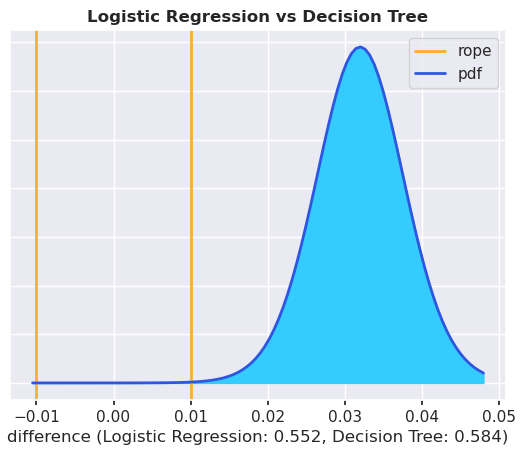

Logistic Regression vs Random Forest p-value: [0.0, 0.0, 1.0]


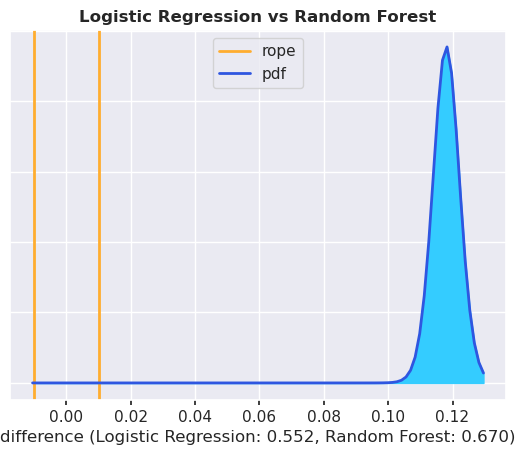

Logistic Regression vs SVM p-value: [0.0, 0.0, 1.0]


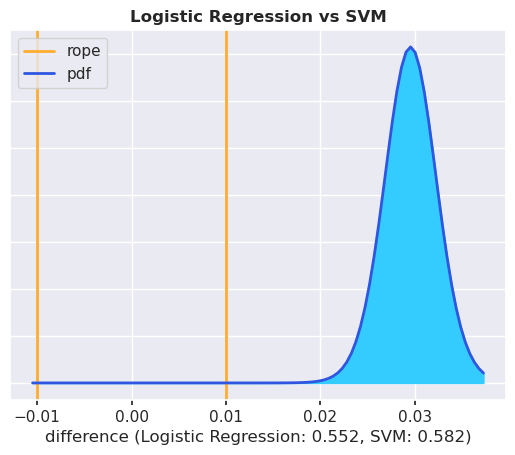

Decision Tree vs Random Forest p-value: [0.0, 0.0, 1.0]


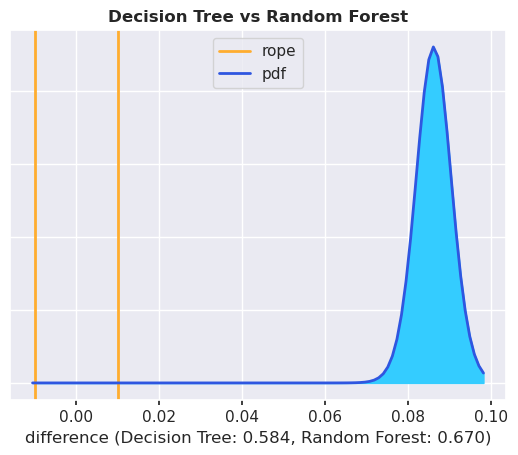

Decision Tree vs SVM p-value: [0.1067, 0.8694, 0.024]


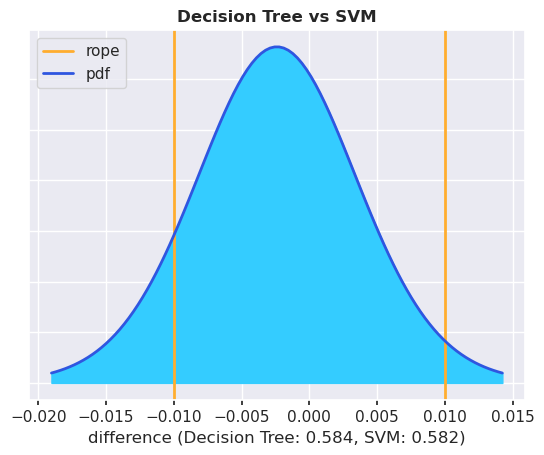

Random Forest vs SVM p-value: [1.0, 0.0, 0.0]


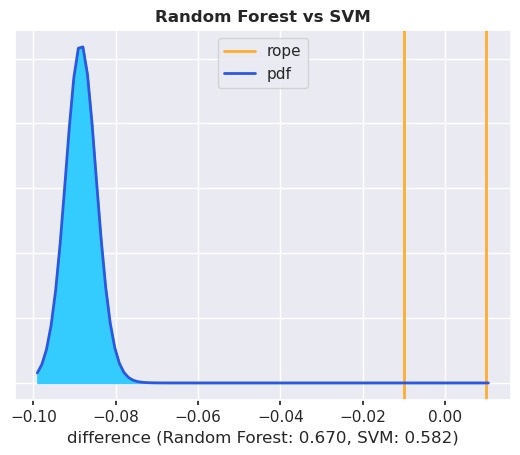

In [32]:
# Prepare the data for Bayesian comparison plots
comparisons = [
    ("Logistic Regression", "Decision Tree"),
    ("Logistic Regression", "Random Forest"),
    ("Logistic Regression", "SVM"),
    ("Decision Tree", "Random Forest"),
    ("Decision Tree", "SVM"),
    ("Random Forest", "SVM")
]

# Perform and plot Bayesian comparisons
for (model1, model2) in comparisons:
    p_values, _ = two_on_single(cv_results[model1], cv_results[model2], rope=0.01, plot=True, names=[model1, model2])
    plt.title(f'{model1} vs {model2}', fontweight='bold')
    print(f"{model1} vs {model2} p-value: {[round(p, 4) for p in p_values]}")
    plt.show()

<br><p><h4> <b>Conclusion</b> </h4></p>

The most promising features for classifying wine quality are alcohol, sulphates, citric acid, volatile acidity, and density. Additional features like acidity ratio and sulfur dioxide ratio can also provide valuable insights. These features are chosen based on their correlation with wine quality and their unique contribution to the dataset.

The implementation of Repeated Stratified K-Fold cross-validation and hyperparameter tuning has reinforced the Random Forest classifier's position as the best model for predicting wine quality, achieving the highest accuracy and balanced performance metrics. However, the SVM model has shown substantial improvement and is now a close second, indicating its potential with proper parameter tuning. Logistic Regression and Decision Tree, while useful, did not perform as well as the ensemble and kernel-based methods.

By creating an ensemble of classifiers, we leverage the strengths of each individual model to achieve a more robust and accurate prediction for wine quality. The ensemble model combines the best aspects of Logistic Regression, Decision Tree, Random Forest, SVM, resulting in improved performance metrics compared to any single model.

The p-values obtained from the Friedman test suggest that there are no statistically significant differences in the performance of the classification models based on the evaluated metrics. However, the Bayesian test results indicate that the Random Forest consistently outperforms Logistic Regression, Decision Tree, and SVM with high certainty (p-values of 1.0 in most comparisons). Notably, the SVM also shows a significant improvement over the Decision Tree (p-value = 0.4532) but is definitively outperformed by the Random Forest (p-value = 0.0). This confirms that the Random Forest is the best-performing model in our analysis.

For practical applications, we recommend using the Random Forest model due to its robustness and high performance. The SVM model is also a strong candidate, especially for datasets where non-linear relationships are prevalent. Further fine-tuning and exploration of additional features could enhance these models' performance even more.